In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_absolute = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_absolute.txt', index_col=0)
Initial_absolute.index = Initial_absolute.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_absolute = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_absolute.txt', index_col=0)
Recurrence_absolute.index = Recurrence_absolute.index.map(lambda x: str(x)[:-2])

In [6]:
#add patient info for the ones with initial data
common = Initial_absolute.index.intersection(Patient_Info.index)
common2 = Recurrence_absolute.index.intersection(Patient_Info.index)
final_common = Recurrence_absolute.index.intersection(Initial_absolute.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', name='Mixture', length=181)

In [7]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
Grade1 = combined_data.loc[:, combined_data.columns == "Grade_1"]
Grade2 = combined_data.loc[:, combined_data.columns == "Grade_2"]
grade_data = Grade1.join(Grade2)
grade_data

Grade_1 Grade_2
Patient_ID                
PS001           IV      IV
PS002           IV      IV
PS003           IV      IV
PS004           IV      IV
PS005           IV      IV
PS006           IV      IV
PS007           IV      IV
PS008           IV      IV
PS009           IV      IV
PS010           IV      IV
PS012           IV      IV
PS019           IV      IV
PS020           IV      IV
PS021           IV      IV
PS022           IV      IV
PS023           IV      IV
PS024           IV      IV
PS025           IV      IV
PS026           IV      IV
PS027           IV      IV
PS029           IV      IV
PS030           IV      IV
PS033           IV      IV
PS034           IV      IV
PS035           IV      IV
PS038           IV      IV
PS042           IV      IV
PS056           IV      IV
PS060           IV      IV
PS061           IV      IV
PS063           IV      IV
PS064           IV      IV
PS065           IV      IV
PS066           IV      IV
PS067           IV      IV
PS068           IV      IV
PS070           IV      IV
PS071           IV      IV
PS072           IV      IV
PS074           IV      IV
PS076           IV      IV
PS078           IV      IV
PS080           IV      IV
PS081           IV      IV
PS082           IV      IV
PS083           IV      IV
PS084           IV      IV
PS085           IV      IV
PS087           IV      IV
PS088           IV      IV
PS089           IV      IV
PS090           IV      IV
PS092           IV      IV
PS093           IV      IV
PS095           IV      IV
PS099           IV      IV
PS100           IV      IV
PS101           IV      IV
PS102           IV      IV
PS103           IV      IV
PS104           IV      IV
PS106           IV      IV
PS107           IV      IV
PS108           IV      IV
PS109           IV      IV
PS110           IV      IV
PS111           IV      IV
PS112           IV      IV
PS113           IV      IV
PS114           IV      IV
PS117           IV      IV
PS118           II      IV
PS122           IV      IV
PS123           IV      IV
PS124          III      IV
PS125           IV      IV
PS126           II      IV
PS127           II      IV
PS130           IV      IV
PS132           II      IV
PS133           II     III
PS135           IV      IV
PS136           II      IV
PS137           IV      IV
PS138           IV      IV
PS139           II      IV
PS140           IV      IV
PS141           II      IV
PS142           II     III
PS143          III      IV
PS144           II      IV
PS146          III      IV
PS147           II      IV
PS148           II      IV
PS149          III      IV
PS150           II      IV
PS151           II      IV
PS152           II     III
PS153          III      IV
PS155          III      IV
PS156           II      IV
PS157           IV      IV
PS158          III     III
PS159           II      II
PS160           IV      IV
PS161           IV      IV
PS162           IV      IV
PS163           IV      IV
PS164           IV      IV
PS165           IV      IV
PS166          III      IV
PS167           II     III
PS168           IV      IV
PS169           II     III
PS170           IV      IV
PS171           IV      IV
PS172          III     III
PS173          III      IV
PS174           IV      IV
PS175           IV      IV
PS176           IV      IV
PS177           IV      IV
PS178           II      IV
PS179           IV      IV
PS180          III     III
PS181           IV      IV
PS182           II      IV
PS184           II      IV
PS185           II     III
PS186           II      IV
PS187           IV      IV
PS188           II      IV
PS189           IV      IV
PS190           IV      IV
PS252          III     III
PS253           II     III
PS255          III      IV
PS256          III      II
PS257           II      IV
PS258          III     III
PS259          III      IV
PS260           II      IV
PS261           II     III
PS262           II     III
PS263           II      II
PS264           II      II
PS265          

In [8]:
#selecting for recurrence
select = grade_data[(grade_data['Grade_1']=="IV")&(grade_data['Grade_2']=="IV")]
grade_data.loc[select.index, 'Progression'] = "Recurrence"
grade_data

Grade_1 Grade_2 Progression
Patient_ID                            
PS001           IV      IV  Recurrence
PS002           IV      IV  Recurrence
PS003           IV      IV  Recurrence
PS004           IV      IV  Recurrence
PS005           IV      IV  Recurrence
PS006           IV      IV  Recurrence
PS007           IV      IV  Recurrence
PS008           IV      IV  Recurrence
PS009           IV      IV  Recurrence
PS010           IV      IV  Recurrence
PS012           IV      IV  Recurrence
PS019           IV      IV  Recurrence
PS020           IV      IV  Recurrence
PS021           IV      IV  Recurrence
PS022           IV      IV  Recurrence
PS023           IV      IV  Recurrence
PS024           IV      IV  Recurrence
PS025           IV      IV  Recurrence
PS026           IV      IV  Recurrence
PS027           IV      IV  Recurrence
PS029           IV      IV  Recurrence
PS030           IV      IV  Recurrence
PS033           IV      IV  Recurrence
PS034           IV      IV  Recurrence
PS035           IV      IV  Recurrence
PS038           IV      IV  Recurrence
PS042           IV      IV  Recurrence
PS056           IV      IV  Recurrence
PS060           IV      IV  Recurrence
PS061           IV      IV  Recurrence
PS063           IV      IV  Recurrence
PS064           IV      IV  Recurrence
PS065           IV      IV  Recurrence
PS066           IV      IV  Recurrence
PS067           IV      IV  Recurrence
PS068           IV      IV  Recurrence
PS070           IV      IV  Recurrence
PS071           IV      IV  Recurrence
PS072           IV      IV  Recurrence
PS074           IV      IV  Recurrence
PS076           IV      IV  Recurrence
PS078           IV      IV  Recurrence
PS080           IV      IV  Recurrence
PS081           IV      IV  Recurrence
PS082           IV      IV  Recurrence
PS083           IV      IV  Recurrence
PS084           IV      IV  Recurrence
PS085           IV      IV  Recurrence
PS087           IV      IV  Recurrence
PS088           IV      IV  Recurrence
PS089           IV      IV  Recurrence
PS090           IV      IV  Recurrence
PS092           IV      IV  Recurrence
PS093           IV      IV  Recurrence
PS095           IV      IV  Recurrence
PS099           IV      IV  Recurrence
PS100           IV      IV  Recurrence
PS101           IV      IV  Recurrence
PS102           IV      IV  Recurrence
PS103           IV      IV  Recurrence
PS104           IV      IV  Recurrence
PS106           IV      IV  Recurrence
PS107           IV      IV  Recurrence
PS108           IV      IV  Recurrence
PS109           IV      IV  Recurrence
PS110           IV      IV  Recurrence
PS111           IV      IV  Recurrence
PS112           IV      IV  Recurrence
PS113           IV      IV  Recurrence
PS114           IV      IV  Recurrence
PS117           IV      IV  Recurrence
PS118           II      IV         NaN
PS122           IV      IV  Recurrence
PS123           IV      IV  Recurrence
PS124          III      IV         NaN
PS125           IV      IV  Recurrence
PS126           II      IV         NaN
PS127           II      IV         NaN
PS130           IV      IV  Recurrence
PS132           II      IV         NaN
PS133           II     III         NaN
PS135           IV      IV  Recurrence
PS136           II      IV         NaN
PS137           IV      IV  Recurrence
PS138           IV      IV  Recurrence
PS139           II      IV         NaN
PS140           IV      IV  Recurrence
PS141           II      IV         NaN
PS142           II     III         NaN
PS143          III      IV         NaN
PS144           II      IV         NaN
PS146          III      IV         NaN
PS147           II      IV         NaN
PS148           II      IV         NaN
PS149          III      IV         NaN
PS150           II      IV         NaN
PS151           II      IV         NaN
PS152           II     III         NaN
PS153          III      IV         NaN
PS155          III      IV         NaN
PS156           II      IV       

In [9]:
#selecting for no progression
select2 = grade_data[(grade_data['Grade_2']=="II")]
select3 = grade_data[(grade_data['Grade_2']=="III")]
grade_data.loc[select2.index, 'Progression'] = "No Progression"
grade_data.loc[select3.index, 'Progression'] = "No Progression"
grade_data

Grade_1 Grade_2     Progression
Patient_ID                                
PS001           IV      IV      Recurrence
PS002           IV      IV      Recurrence
PS003           IV      IV      Recurrence
PS004           IV      IV      Recurrence
PS005           IV      IV      Recurrence
PS006           IV      IV      Recurrence
PS007           IV      IV      Recurrence
PS008           IV      IV      Recurrence
PS009           IV      IV      Recurrence
PS010           IV      IV      Recurrence
PS012           IV      IV      Recurrence
PS019           IV      IV      Recurrence
PS020           IV      IV      Recurrence
PS021           IV      IV      Recurrence
PS022           IV      IV      Recurrence
PS023           IV      IV      Recurrence
PS024           IV      IV      Recurrence
PS025           IV      IV      Recurrence
PS026           IV      IV      Recurrence
PS027           IV      IV      Recurrence
PS029           IV      IV      Recurrence
PS030           IV      IV      Recurrence
PS033           IV      IV      Recurrence
PS034           IV      IV      Recurrence
PS035           IV      IV      Recurrence
PS038           IV      IV      Recurrence
PS042           IV      IV      Recurrence
PS056           IV      IV      Recurrence
PS060           IV      IV      Recurrence
PS061           IV      IV      Recurrence
PS063           IV      IV      Recurrence
PS064           IV      IV      Recurrence
PS065           IV      IV      Recurrence
PS066           IV      IV      Recurrence
PS067           IV      IV      Recurrence
PS068           IV      IV      Recurrence
PS070           IV      IV      Recurrence
PS071           IV      IV      Recurrence
PS072           IV      IV      Recurrence
PS074           IV      IV      Recurrence
PS076           IV      IV      Recurrence
PS078           IV      IV      Recurrence
PS080           IV      IV      Recurrence
PS081           IV      IV      Recurrence
PS082           IV      IV      Recurrence
PS083           IV      IV      Recurrence
PS084           IV      IV      Recurrence
PS085           IV      IV      Recurrence
PS087           IV      IV      Recurrence
PS088           IV      IV      Recurrence
PS089           IV      IV      Recurrence
PS090           IV      IV      Recurrence
PS092           IV      IV      Recurrence
PS093           IV      IV      Recurrence
PS095           IV      IV      Recurrence
PS099           IV      IV      Recurrence
PS100           IV      IV      Recurrence
PS101           IV      IV      Recurrence
PS102           IV      IV      Recurrence
PS103           IV      IV      Recurrence
PS104           IV      IV      Recurrence
PS106           IV      IV      Recurrence
PS107           IV      IV      Recurrence
PS108           IV      IV      Recurrence
PS109           IV      IV      Recurrence
PS110           IV      IV      Recurrence
PS111           IV      IV      Recurrence
PS112           IV      IV      Recurrence
PS113           IV      IV      Recurrence
PS114           IV      IV      Recurrence
PS117           IV      IV      Recurrence
PS118           II      IV             NaN
PS122           IV      IV      Recurrence
PS123           IV      IV      Recurrence
PS124          III      IV             NaN
PS125           IV      IV      Recurrence
PS126           II      IV             NaN
PS127           II      IV             NaN
PS130           IV      IV      Recurrence
PS132           II      IV             NaN
PS133           II     III  No Progression
PS135           IV      IV      Recurrence
PS136           II      IV             NaN
PS137           IV      IV      Recurrence
PS138           IV      IV      Recurrence
PS139           II      IV             NaN
PS140           IV      IV      Recurrence
PS141           II      IV             NaN
PS142           II     III  No Progression
PS143          III      IV             NaN
PS144           II      IV             NaN
PS146       

In [10]:
grade_data = grade_data.fillna("Progression")
grade_data

Grade_1 Grade_2     Progression
Patient_ID                                
PS001           IV      IV      Recurrence
PS002           IV      IV      Recurrence
PS003           IV      IV      Recurrence
PS004           IV      IV      Recurrence
PS005           IV      IV      Recurrence
PS006           IV      IV      Recurrence
PS007           IV      IV      Recurrence
PS008           IV      IV      Recurrence
PS009           IV      IV      Recurrence
PS010           IV      IV      Recurrence
PS012           IV      IV      Recurrence
PS019           IV      IV      Recurrence
PS020           IV      IV      Recurrence
PS021           IV      IV      Recurrence
PS022           IV      IV      Recurrence
PS023           IV      IV      Recurrence
PS024           IV      IV      Recurrence
PS025           IV      IV      Recurrence
PS026           IV      IV      Recurrence
PS027           IV      IV      Recurrence
PS029           IV      IV      Recurrence
PS030           IV      IV      Recurrence
PS033           IV      IV      Recurrence
PS034           IV      IV      Recurrence
PS035           IV      IV      Recurrence
PS038           IV      IV      Recurrence
PS042           IV      IV      Recurrence
PS056           IV      IV      Recurrence
PS060           IV      IV      Recurrence
PS061           IV      IV      Recurrence
PS063           IV      IV      Recurrence
PS064           IV      IV      Recurrence
PS065           IV      IV      Recurrence
PS066           IV      IV      Recurrence
PS067           IV      IV      Recurrence
PS068           IV      IV      Recurrence
PS070           IV      IV      Recurrence
PS071           IV      IV      Recurrence
PS072           IV      IV      Recurrence
PS074           IV      IV      Recurrence
PS076           IV      IV      Recurrence
PS078           IV      IV      Recurrence
PS080           IV      IV      Recurrence
PS081           IV      IV      Recurrence
PS082           IV      IV      Recurrence
PS083           IV      IV      Recurrence
PS084           IV      IV      Recurrence
PS085           IV      IV      Recurrence
PS087           IV      IV      Recurrence
PS088           IV      IV      Recurrence
PS089           IV      IV      Recurrence
PS090           IV      IV      Recurrence
PS092           IV      IV      Recurrence
PS093           IV      IV      Recurrence
PS095           IV      IV      Recurrence
PS099           IV      IV      Recurrence
PS100           IV      IV      Recurrence
PS101           IV      IV      Recurrence
PS102           IV      IV      Recurrence
PS103           IV      IV      Recurrence
PS104           IV      IV      Recurrence
PS106           IV      IV      Recurrence
PS107           IV      IV      Recurrence
PS108           IV      IV      Recurrence
PS109           IV      IV      Recurrence
PS110           IV      IV      Recurrence
PS111           IV      IV      Recurrence
PS112           IV      IV      Recurrence
PS113           IV      IV      Recurrence
PS114           IV      IV      Recurrence
PS117           IV      IV      Recurrence
PS118           II      IV     Progression
PS122           IV      IV      Recurrence
PS123           IV      IV      Recurrence
PS124          III      IV     Progression
PS125           IV      IV      Recurrence
PS126           II      IV     Progression
PS127           II      IV     Progression
PS130           IV      IV      Recurrence
PS132           II      IV     Progression
PS133           II     III  No Progression
PS135           IV      IV      Recurrence
PS136           II      IV     Progression
PS137           IV      IV      Recurrence
PS138           IV      IV      Recurrence
PS139           II      IV     Progression
PS140           IV      IV      Recurrence
PS141           II      IV     Progression
PS142           II     III  No Progression
PS143          III      IV     Progression
PS144           II      IV     Progression
PS146       

In [11]:
initial_final = pd.concat([grade_data, Initial_absolute], axis=1)
initial_final = initial_final[initial_final.index.isin(final_common)]
initial_final.index.name = 'Mixture'
initial_final = initial_final.drop(['Grade_1', 'Grade_2', 'P-value','Correlation','RMSE'], axis=1)
initial_final = initial_final.sort_values(by='Mixture')
initial_final['Type'] = 'Initial'
initial_final

Progression   Naive B  Memory B  CD8+ naive T  KLRG1-low CD8+ Tcm  \
Mixture                                                                         
PS001        Recurrence  0.028152  0.075570      0.146253            0.001475   
PS002        Recurrence  0.021507  0.136212      0.158629            0.001979   
PS003        Recurrence  0.006610  0.114975      0.270254            0.082956   
PS004        Recurrence  0.009584  0.111689      0.202716            0.126260   
PS005        Recurrence  0.026582  0.101913      0.213033            0.000000   
PS006        Recurrence  0.000000  0.173038      0.208682            0.177315   
PS007        Recurrence  0.043610  0.111419      0.170748            0.000000   
PS008        Recurrence  0.009015  0.181356      0.341306            0.000000   
PS009        Recurrence  0.000000  0.180929      0.227053            0.034240   
PS010        Recurrence  0.035446  0.190856      0.264285            0.000000   
PS012        Recurrence  0.000000  0.227015      0.330873            0.075624   
PS019        Recurrence  0.041092  0.094917      0.159708            0.015226   
PS020        Recurrence  0.018851  0.095849      0.132810            0.118809   
PS021        Recurrence  0.031260  0.104849      0.167074            0.068585   
PS022        Recurrence  0.046333  0.057280      0.106257            0.167430   
PS023        Recurrence  0.056691  0.068103      0.173580            0.170923   
PS024        Recurrence  0.037383  0.089116      0.106058            0.039786   
PS025        Recurrence  0.027664  0.058336      0.136355            0.091119   
PS026        Recurrence  0.033348  0.094752      0.160881            0.086523   
PS027        Recurrence  0.000000  0.170669      0.209407            0.068594   
PS029        Recurrence  0.040873  0.066661      0.129265            0.068914   
PS030        Recurrence  0.000000  0.161641      0.231808            0.057968   
PS033        Recurrence  0.021235  0.067410      0.115173            0.043327   
PS034        Recurrence  0.031436  0.077851      0.094234            0.093556   
PS035        Recurrence  0.012059  0.133198      0.211579            0.153165   
PS038        Recurrence  0.025724  0.113643      0.195022            0.080619   
PS042        Recurrence  0.017585  0.063261      0.097207            0.104718   
PS056        Recurrence  0.016476  0.106523      0.192954            0.000000   
PS060        Recurrence  0.036687  0.087211      0.137172            0.000000   
PS061        Recurrence  0.009800  0.082625      0.218877            0.012051   
PS063        Recurrence  0.030610  0.094506      0.132895            0.002525   
PS064        Recurrence  0.001836  0.128649      0.258588            0.018941   
PS065        Recurrence  0.011559  0.123663      0.175774            0.000000   
PS066        Recurrence  0.038893  0.089130      0.199116            0.000000   
PS067        Recurrence  0.043579  0.071020      0.172094            0.003002   
PS068        Recurrence  0.000000  0.191604      0.314487            0.000000   
PS070        Recurrence  0.031412  0.108512      0.180145            0.026289   
PS071        Recurrence  0.066214  0.045448      0.375040            0.018671   
PS072        Recurrence  0.034604  0.102631      0.180071            0.092550   
PS074        Recurrence  0.020922  0.100345      0.200462            0.000000   
PS076        Recurrence  0.050085  0.125800      0.316320            0.000000   
PS078        Recurrence  0.013535  0.115093      0.180158            0.090821   
PS080        Recurrence  0.029922  0.129008      0.263694            0.033873   
PS081        Recurrence  0.000748  0.139635      0.238920            0.024661   
PS082        Recurrence  0.036096  0.065714      0.168822            0.009879   
PS083        Recurrence  0.015370  0.093817      0.119889            0.000000   
PS084        Recurrence  0.005533  0.194311      0.312928            0.095747   
PS085        Recurrence  0.023375  0.076980

In [12]:
recurrence_final = pd.concat([grade_data, Recurrence_absolute], axis=1)
recurrence_final = recurrence_final[recurrence_final.index.isin(final_common)]
recurrence_final.index.name = 'Mixture'
recurrence_final = recurrence_final.drop(['Grade_1', 'Grade_2', 'P-value','Correlation','RMSE'], axis=1)
recurrence_final = recurrence_final.sort_values(by='Mixture')
recurrence_final['Type'] = 'Recurrence'
recurrence_final

Progression   Naive B  Memory B  CD8+ naive T  KLRG1-low CD8+ Tcm  \
Mixture                                                                         
PS001        Recurrence  0.090779  0.033450      0.181110            0.026866   
PS002        Recurrence  0.066847  0.077545      0.140768            0.080173   
PS003        Recurrence  0.064486  0.102726      0.146381            0.101396   
PS004        Recurrence  0.039100  0.100190      0.075614            0.089049   
PS005        Recurrence  0.093696  0.070452      0.207710            0.008042   
PS006        Recurrence  0.070762  0.053967      0.174030            0.119437   
PS007        Recurrence  0.081268  0.049196      0.066075            0.019138   
PS008        Recurrence  0.089660  0.093435      0.277336            0.001192   
PS009        Recurrence  0.080203  0.089883      0.245205            0.103055   
PS010        Recurrence  0.094486  0.076544      0.214490            0.064768   
PS012        Recurrence  0.099367  0.137877      0.286119            0.157531   
PS019        Recurrence  0.057311  0.060226      0.082018            0.107524   
PS020        Recurrence  0.049618  0.057960      0.127500            0.164423   
PS021        Recurrence  0.038426  0.043247      0.111705            0.058325   
PS022        Recurrence  0.037830  0.084337      0.138358            0.144836   
PS023        Recurrence  0.059788  0.069938      0.138160            0.117614   
PS024        Recurrence  0.052624  0.033865      0.094558            0.104166   
PS025        Recurrence  0.022442  0.050962      0.095163            0.091182   
PS026        Recurrence  0.036980  0.065449      0.081083            0.091316   
PS027        Recurrence  0.053323  0.097007      0.175736            0.138955   
PS029        Recurrence  0.051247  0.053211      0.147569            0.102245   
PS030        Recurrence  0.066002  0.060550      0.089975            0.124712   
PS033        Recurrence  0.055759  0.021823      0.101395            0.054997   
PS034        Recurrence  0.060024  0.041259      0.072144            0.023644   
PS035        Recurrence  0.058138  0.044543      0.084964            0.049247   
PS038        Recurrence  0.103398  0.018619      0.120164            0.002583   
PS042        Recurrence  0.032544  0.058212      0.120455            0.115101   
PS056        Recurrence  0.083861  0.063347      0.176442            0.054667   
PS060        Recurrence  0.067071  0.044282      0.139501            0.000000   
PS061        Recurrence  0.067104  0.033007      0.151864            0.081279   
PS063        Recurrence  0.059308  0.036481      0.114147            0.034238   
PS064        Recurrence  0.100220  0.000000      0.193478            0.080475   
PS065        Recurrence  0.074535  0.073347      0.152199            0.203473   
PS066        Recurrence  0.080089  0.059685      0.153696            0.000000   
PS067        Recurrence  0.077313  0.017863      0.112563            0.041581   
PS068        Recurrence  0.090429  0.051050      0.180314            0.025582   
PS070        Recurrence  0.121078  0.037626      0.220041            0.000000   
PS071        Recurrence  0.131879  0.013129      0.236413            0.000000   
PS072        Recurrence  0.044860  0.084932      0.078488            0.087939   
PS074        Recurrence  0.049080  0.067078      0.085550            0.137642   
PS076        Recurrence  0.097187  0.057282      0.264207            0.205508   
PS078        Recurrence  0.068498  0.074316      0.137591            0.080595   
PS080        Recurrence  0.084095  0.064951      0.164684            0.072858   
PS081        Recurrence  0.067704  0.101841      0.191437            0.067480   
PS082        Recurrence  0.045979  0.055399      0.139870            0.000000   
PS083        Recurrence  0.142033  0.004819      0.194871            0.000000   
PS084        Recurrence  0.047332  0.109391      0.249294            0.000000   
PS085        Recurrence  0.048477  0.058719

In [13]:
finalfinal = pd.concat([initial_final, recurrence_final]) 
finalfinal

Progression   Naive B  Memory B  CD8+ naive T  KLRG1-low CD8+ Tcm  \
Mixture                                                                         
PS001        Recurrence  0.028152  0.075570      0.146253            0.001475   
PS002        Recurrence  0.021507  0.136212      0.158629            0.001979   
PS003        Recurrence  0.006610  0.114975      0.270254            0.082956   
PS004        Recurrence  0.009584  0.111689      0.202716            0.126260   
PS005        Recurrence  0.026582  0.101913      0.213033            0.000000   
PS006        Recurrence  0.000000  0.173038      0.208682            0.177315   
PS007        Recurrence  0.043610  0.111419      0.170748            0.000000   
PS008        Recurrence  0.009015  0.181356      0.341306            0.000000   
PS009        Recurrence  0.000000  0.180929      0.227053            0.034240   
PS010        Recurrence  0.035446  0.190856      0.264285            0.000000   
PS012        Recurrence  0.000000  0.227015      0.330873            0.075624   
PS019        Recurrence  0.041092  0.094917      0.159708            0.015226   
PS020        Recurrence  0.018851  0.095849      0.132810            0.118809   
PS021        Recurrence  0.031260  0.104849      0.167074            0.068585   
PS022        Recurrence  0.046333  0.057280      0.106257            0.167430   
PS023        Recurrence  0.056691  0.068103      0.173580            0.170923   
PS024        Recurrence  0.037383  0.089116      0.106058            0.039786   
PS025        Recurrence  0.027664  0.058336      0.136355            0.091119   
PS026        Recurrence  0.033348  0.094752      0.160881            0.086523   
PS027        Recurrence  0.000000  0.170669      0.209407            0.068594   
PS029        Recurrence  0.040873  0.066661      0.129265            0.068914   
PS030        Recurrence  0.000000  0.161641      0.231808            0.057968   
PS033        Recurrence  0.021235  0.067410      0.115173            0.043327   
PS034        Recurrence  0.031436  0.077851      0.094234            0.093556   
PS035        Recurrence  0.012059  0.133198      0.211579            0.153165   
PS038        Recurrence  0.025724  0.113643      0.195022            0.080619   
PS042        Recurrence  0.017585  0.063261      0.097207            0.104718   
PS056        Recurrence  0.016476  0.106523      0.192954            0.000000   
PS060        Recurrence  0.036687  0.087211      0.137172            0.000000   
PS061        Recurrence  0.009800  0.082625      0.218877            0.012051   
PS063        Recurrence  0.030610  0.094506      0.132895            0.002525   
PS064        Recurrence  0.001836  0.128649      0.258588            0.018941   
PS065        Recurrence  0.011559  0.123663      0.175774            0.000000   
PS066        Recurrence  0.038893  0.089130      0.199116            0.000000   
PS067        Recurrence  0.043579  0.071020      0.172094            0.003002   
PS068        Recurrence  0.000000  0.191604      0.314487            0.000000   
PS070        Recurrence  0.031412  0.108512      0.180145            0.026289   
PS071        Recurrence  0.066214  0.045448      0.375040            0.018671   
PS072        Recurrence  0.034604  0.102631      0.180071            0.092550   
PS074        Recurrence  0.020922  0.100345      0.200462            0.000000   
PS076        Recurrence  0.050085  0.125800      0.316320            0.000000   
PS078        Recurrence  0.013535  0.115093      0.180158            0.090821   
PS080        Recurrence  0.029922  0.129008      0.263694            0.033873   
PS081        Recurrence  0.000748  0.139635      0.238920            0.024661   
PS082        Recurrence  0.036096  0.065714      0.168822            0.009879   
PS083        Recurrence  0.015370  0.093817      0.119889            0.000000   
PS084        Recurrence  0.005533  0.194311      0.312928            0.095747   
PS085        Recurrence  0.023375  0.076980

In [14]:
final_mdf = pd.melt(finalfinal.reset_index(), id_vars=('Mixture', 'Type','Progression'))
final_mdf

Mixture        Type     Progression                    variable     value
0      PS001     Initial      Recurrence                     Naive B  0.028152
1      PS002     Initial      Recurrence                     Naive B  0.021507
2      PS003     Initial      Recurrence                     Naive B  0.006610
3      PS004     Initial      Recurrence                     Naive B  0.009584
4      PS005     Initial      Recurrence                     Naive B  0.026582
5      PS006     Initial      Recurrence                     Naive B  0.000000
6      PS007     Initial      Recurrence                     Naive B  0.043610
7      PS008     Initial      Recurrence                     Naive B  0.009015
8      PS009     Initial      Recurrence                     Naive B  0.000000
9      PS010     Initial      Recurrence                     Naive B  0.035446
10     PS012     Initial      Recurrence                     Naive B  0.000000
11     PS019     Initial      Recurrence                     Naive B  0.041092
12     PS020     Initial      Recurrence                     Naive B  0.018851
13     PS021     Initial      Recurrence                     Naive B  0.031260
14     PS022     Initial      Recurrence                     Naive B  0.046333
15     PS023     Initial      Recurrence                     Naive B  0.056691
16     PS024     Initial      Recurrence                     Naive B  0.037383
17     PS025     Initial      Recurrence                     Naive B  0.027664
18     PS026     Initial      Recurrence                     Naive B  0.033348
19     PS027     Initial      Recurrence                     Naive B  0.000000
20     PS029     Initial      Recurrence                     Naive B  0.040873
21     PS030     Initial      Recurrence                     Naive B  0.000000
22     PS033     Initial      Recurrence                     Naive B  0.021235
23     PS034     Initial      Recurrence                     Naive B  0.031436
24     PS035     Initial      Recurrence                     Naive B  0.012059
25     PS038     Initial      Recurrence                     Naive B  0.025724
26     PS042     Initial      Recurrence                     Naive B  0.017585
27     PS056     Initial      Recurrence                     Naive B  0.016476
28     PS060     Initial      Recurrence                     Naive B  0.036687
29     PS061     Initial      Recurrence                     Naive B  0.009800
30     PS063     Initial      Recurrence                     Naive B  0.030610
31     PS064     Initial      Recurrence                     Naive B  0.001836
32     PS065     Initial      Recurrence                     Naive B  0.011559
33     PS066     Initial      Recurrence                     Naive B  0.038893
34     PS067     Initial      Recurrence                     Naive B  0.043579
35     PS068     Initial      Recurrence                     Naive B  0.000000
36     PS070     Initial      Recurrence                     Naive B  0.031412
37     PS071     Initial      Recurrence                     Naive B  0.066214
38     PS072     Initial      Recurrence                     Naive B  0.034604
39     PS074     Initial      Recurrence                     Naive B  0.020922
40     PS076     Initial      Recurrence                     Naive B  0.050085
41     PS078     Initial      Recurrence                     Naive B  0.013535
42     PS080     Initial      Recurrence                     Naive B  0.029922
43     PS081     Initial      Recurrence                     Naive B  0.000748
44     PS082     Initial      Recurrence                     Naive B  0.036096
45     PS083     Initial      Recurrence                     Naive B  0.015370
46     PS084     Initial      Recurrence                     Naive B  0.005533
47     PS085     Initial      Recurrence                     Naive B  0.023375
48     PS087     Initial      Recurrence                     Naive B  0.018384
49     PS088     Initial      Recurrence               

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.606e-12 stat=-9.014e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.559e-35 stat=-1.473e+01
No Progression_Initial v.s. No Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.841e-04 stat=-4.316e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.196e-08 stat=6.660e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.251e-18 stat=9.

<ipython-input-19-636baa5b137a>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5.1))


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=6.569e-03 stat=3.192e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.452e-01
No Progression_Initial v.s. No Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=4.230e-01 stat=1.500e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=9.221e-01 stat=1.029e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-2.7

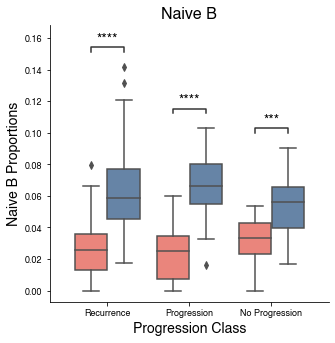

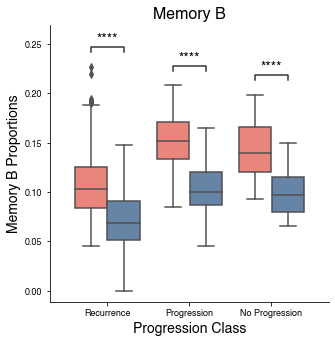

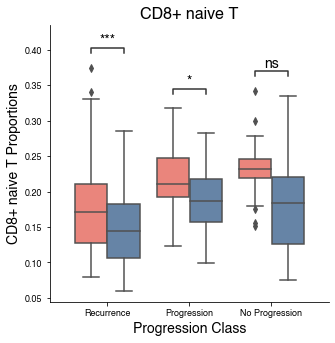

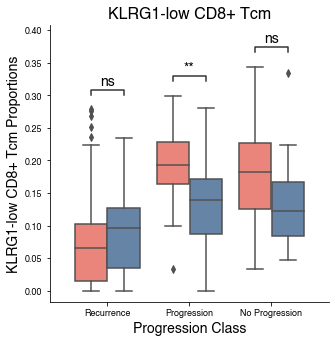

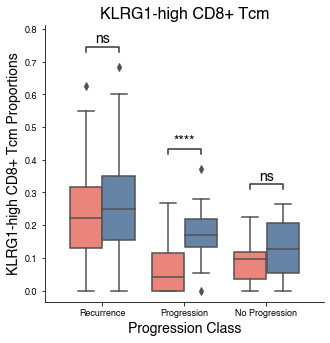

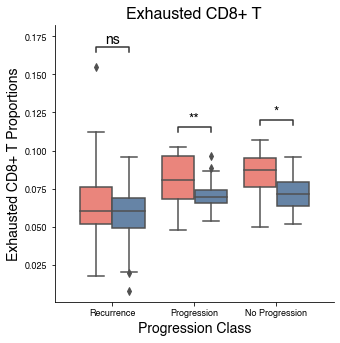

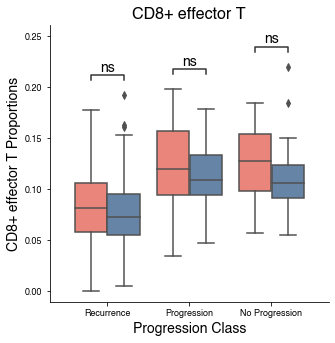

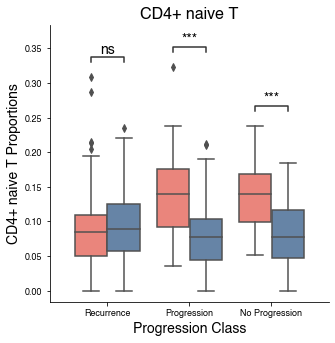

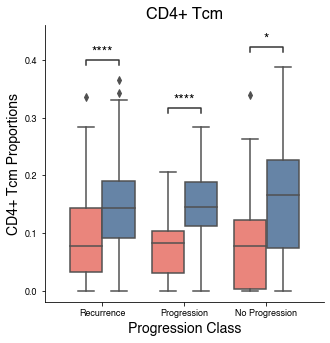

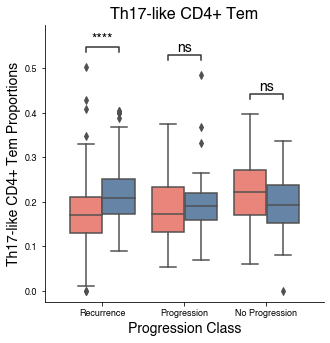

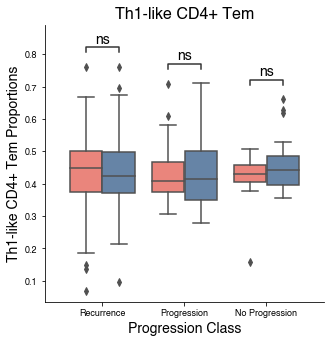

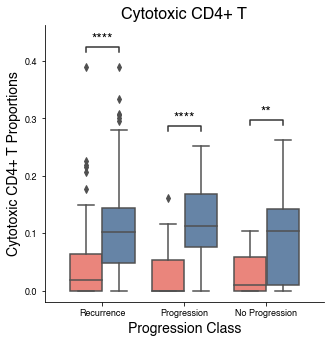

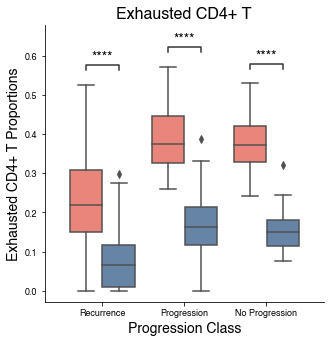

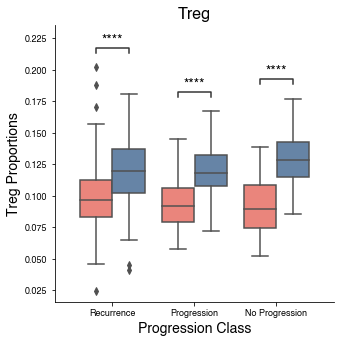

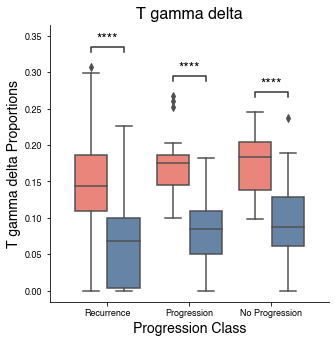

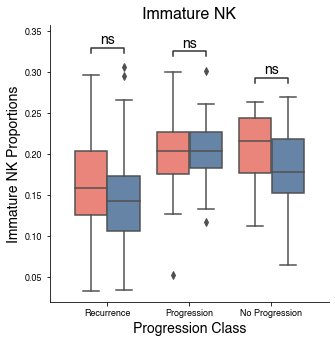

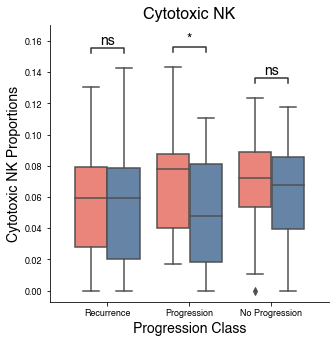

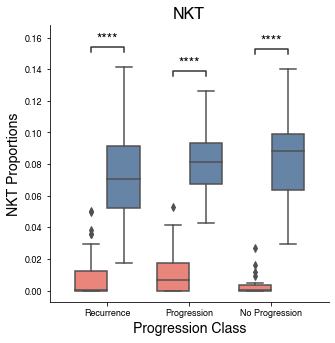

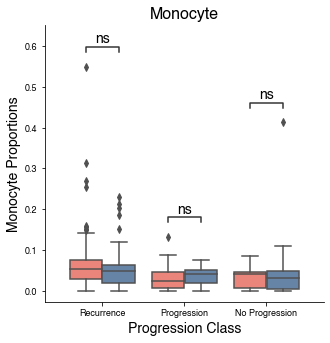

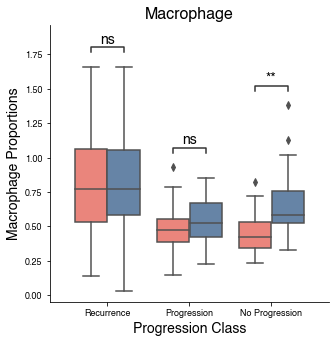

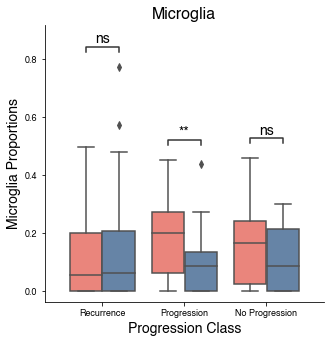

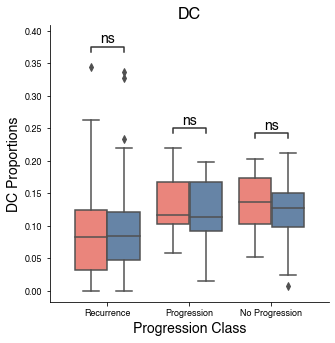

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import statannot
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

box_pairs=[
    (("Recurrence", "Initial"), ("Recurrence", "Recurrence")),
    (("Progression", "Initial"), ("Progression", "Recurrence")),
    (("No Progression", "Initial"), ("No Progression", "Recurrence"))
    ]


cells = list(Initial_absolute.T[0:22].index)
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Progression', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Progression Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14) 
    plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Progression',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )
    plt.savefig(c+'.png')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=2.449e-05 stat=-4.853e+00
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=7.748e-09 stat=-6.180e+00
No Progression_Initial v.s. No Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=3.433e-05 stat=-4.978e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Progression_Initial v.s. Progression_Recurrence: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-3.384e-01
Recurrence_Initial v.s. Recurrence_Recurrence: t-test independent samples with Bonferroni correction, P_val=5.547e-02 stat=2

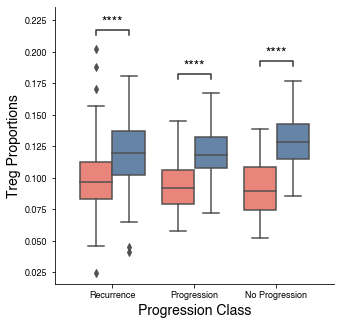

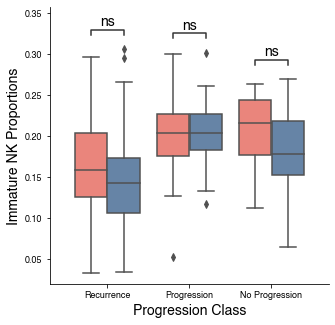

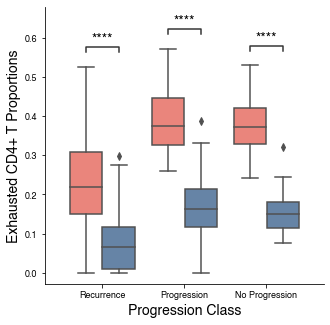

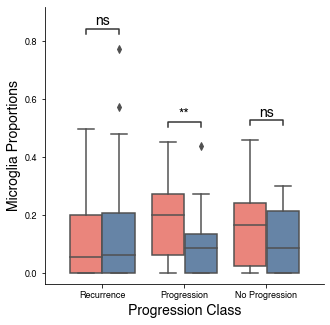

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import statannot
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

box_pairs=[
    (("Recurrence", "Initial"), ("Recurrence", "Recurrence")),
    (("Progression", "Initial"), ("Progression", "Recurrence")),
    (("No Progression", "Initial"), ("No Progression", "Recurrence"))
    ]


cells = ["Treg", "Immature NK", "Exhausted CD4+ T", "Microglia"]
for c in cells:
    tmp = final_mdf.loc[final_mdf['variable'] == c]
    plt.figure(figsize=(5,5.1))
    #plt.rcParams['font.size'] = '8'
    #plt.title(c, fontsize=16)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax = sns.boxplot(x='Progression', y='value',hue="Type", data=tmp)
    ax.set_xlabel("Progression Class", fontsize=14)
    ax.set_ylabel(c+" Proportions", fontsize=14) 
#     plt.legend([],[], frameon=False)
#     ax.legend(loc='upper left',bbox_to_anchor=(1,1), fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)
    sns.despine()
   
    statannot.add_stat_annotation(
        ax,
        data=tmp,
        x='Progression',
        y='value',
        hue="Type",
        box_pairs=box_pairs,
        test="t-test_ind",
        text_format="star",
        loc="inside",
    )


In [17]:
progression = ['Recurrence','Progression','No Progression']

for c in cells:
    specific_cell_type = final_mdf.loc[final_mdf['variable'] == c]
    for p in progression:
        specific_progression = specific_cell_type.loc[specific_cell_type['Progression'] == p]
        first = specific_progression.loc[specific_progression['Type'] == 'Initial']
        second = specific_progression.loc[specific_progression['Type'] == 'Recurrence']
        print(c,' - ', p)
        print('Between Initial and Recurrence: ')
        print(ranksums(first.iloc[:,4], second.iloc[:,4]))
        print ('--------------------------------')

Treg  -  Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=-6.239747550458728, pvalue=4.382776412136501e-10)
--------------------------------
Treg  -  Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-4.148714667822846, pvalue=3.343472311705069e-05)
--------------------------------
Treg  -  No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-3.966873851570021, pvalue=7.282151063429747e-05)
--------------------------------
Immature NK  -  Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=2.328238213426013, pvalue=0.0198994581046283)
--------------------------------
Immature NK  -  Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.12183242455739425, pvalue=0.9030317341397822)
--------------------------------
Immature NK  -  No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=1.5961385911642687, pvalue=0.11045785431304014)
--------------------------------
Exhausted 